# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Life Expectancy of a Country by WHO

## Getting Started
In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from life expectancy of a country. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about life expectancy.

The dataset for this project originates from the [Kaggle Rpository](https://www.kaggle.com/kumarajarshi/life-expectancy-who). The Life expectancy data was collected was from 2000 to 2016 and each of the 2938 entries represent aggregated data about 22 features for life expectancy from various countries collected by WHO(World Health Organisation).



## Exploring the Data
We have to load all the necessary Python libraries and also we have to get the data from csv file to a variable, probably called 'data'. Note that the 4th column from this dataset, `'Life_expectancy'`, will be the target label (Life expectancy of a country). All other columns are features about each country for each year in the dataset.

Run the code cell below to load the Life expectancy dataset, along with a few of the necessary Python libraries required for this project. We will know the dataset loaded successfully if the size of the dataset is reported and display the first few entries for examination using the .head() function..

In [188]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
# import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("LifeExpectancyData.csv")

# Success - Display the first record
display(data.head(n=5))
# Success
print("Life Expectancy dataset has {} data points with {} variables each.".format(*data.shape))

,Country,Year,Status,Life_expectancy,Adult Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Life Expectancy dataset has 2938 data points with 22 variables each.


## Exploring Feature Set

* **Country**: Name of a country. 
* **Year**: Year
* **Status**: Developed or Developing 
* **Adult Mortality**: Number of deaths in adult category 
* **Infant-deaths**: Number of infant deaths
* **Alcohol**: Alcohol consumption rate
* **Percentage expenditure**: Expenditure percentage
* **Hepatitis B and measles**: Number of deaths due to hepatitis and measles.
* **BMI**: Average Body mass index
* **Under five deaths**: Number of deaths under 5 years of age 
* **Polio**: Polio effected number
* **Total_expenditure**: Total expenditure
* **Thinness 1-19 years:** Thinness of people aged 1- 19 years.
* **Thinness 5-9 years:** Thinness of people aged 5- 9 years.
* **GDP** GDP of a country
* **Population**: Population of a country

In [189]:
#loading target variable data into life_exp variable
#dropping variables like hiv/aids, thinness 1-19 years etc to reduces feature variables. All other important features are there to help our prediction
life_exp = data['Life_expectancy']
features = data.drop(['Life_expectancy','Schooling'], axis = 1)

print("Life Expectancy dataset has {} data points with {} variables each.".format(*features.shape))
#show first 5 rows of data

features.head()


Life Expectancy dataset has 2938 data points with 20 variables each.


,Country,Year,Status,Adult Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454


----
## Preparing the Data
Before we use the data as input for our machine learning algorithms(models), it has to be cleaned, formatted, and restructured — this process is known as **preprocessing**. In our dataset we have some null (NaN) values are there which are called missing values. So I will clean them in later steps. And, there are some qualities about certain features that must be adjusted. This preprocessing can help us to get the better outcome and predictive power of nearly all learning algorithms.

- By running the cell below I can know how many missing values there in our data for each feature.

In [190]:
#Preprocessing data... 
print("NaN values in Target variable: ",life_exp.isnull().sum())
features.isnull().sum()

NaN values in Target variable:  10


Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
dtype: int64

# Preprocessing:
- Here we can see that there are total of 10 values missing in Adult mortality feature , 194 in Alcohol feature , 553 in Hepatitis B, 34 in BMI and other features having large number of missing values such as GDP and Population are having 448 and 652 missing values.
- So we have to preprocess this data to go further. So, below is the code which replaces the missing values from all the features with their respective mean values. In Status 0 means 'Developing' and 1 means 'Developed' .


- By running the below cell the above technique will be applied.

In [191]:
# from sklearn.preprocessing import Imputer as imp
# imp = Imputer(missing_values='nan', strategy='mean', axis=0)
# imp = imp.fit(life_exp)
life_exp=life_exp.fillna(life_exp.mean())
features['Status']=features['Status'].replace('Developing',0)
features['Status']=features['Status'].replace('Developed',1)
features['Adult Mortality']=features['Adult Mortality'].fillna(features['Adult Mortality'].mean())
features['Alcohol']=features['Alcohol'].fillna(features['Alcohol'].mean())
features['Hepatitis B']=features['Hepatitis B'].fillna(features['Hepatitis B'].mean())
features['BMI']=features['BMI'].fillna(features['BMI'].mean())
features['Polio']=features['Polio'].fillna(features['Polio'].mean())
features['Total_expenditure']=features['Total_expenditure'].fillna(features['Total_expenditure'].mean())
features['GDP']=features['GDP'].fillna(features['GDP'].mean())
features['Population']=features['Population'].fillna(features['Population'].mean())
features['Diphtheria']=features['Diphtheria'].fillna(features['Diphtheria'].mean())
features['thinness_1-19_years']=features['thinness_1-19_years'].fillna(features['thinness_1-19_years'].mean())
features['thinness_5-9_years']=features['thinness_5-9_years'].fillna(features['thinness_5-9_years'].mean())
features['Income_composition_of_resources']=features['Income_composition_of_resources'].fillna(features['Income_composition_of_resources'].mean())

In [192]:
features.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
Income_composition_of_resources    0
dtype: int64

## EXPLORATORY VISUALIZATION
Exploratory Visualization can be defined as an approach for analyzing data sets to summarize their important characteristics, often by the application of visual methods.

The Primary theme of Exploratory Visualization is for observing what the data can give us an intuition far beyond the conventional modeling or hypothesis testing tasks.

The Following session of Data Visualization will provide the intuition of how each feature is 'Correlated' with the target varaible 'Life_expectation'

**Correlation of 'BMI' with respect to 'Life_expectancy'**

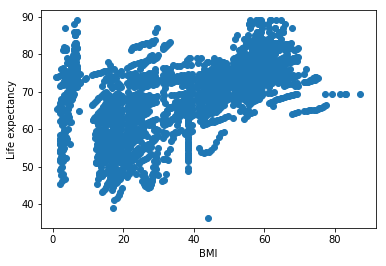

In [193]:
# 
import matplotlib.pyplot as plt
plt.scatter(features['BMI'],life_exp)
plt.ylabel('Life expectancy')
plt.xlabel('BMI')
plt.show()

**Observation:** Here the plot shows that the BMI is correlated with Life expectancy. My intuition is that BMI between 20 and 60 having more life expectancy shown from the graphs.

**Correlation of 'Adult Mortality' with respect to 'Life_expectancy'**

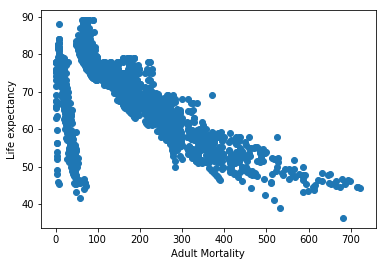

In [194]:
# 
import matplotlib.pyplot as plt
plt.scatter(features['Adult Mortality'],life_exp)
plt.ylabel('Life expectancy')
plt.xlabel('Adult Mortality')
plt.show()

**Obseravtion:** Here 'Adult mortality' has strong correlation with respect to 'Life_expectancy'. Life expectancy is constantly decreasing with in increase in number of deaths or adult mortality rate.

**Correlation of 'Measles' with respect to 'Life_expectancy'**

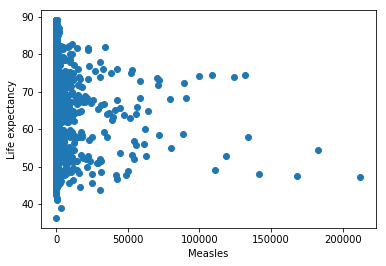

In [195]:
# 
import matplotlib.pyplot as plt
plt.scatter(features['Measles'],life_exp)
plt.ylabel('Life expectancy')
plt.xlabel('Measles')
plt.show()

**Observation:** The above plotting looks like it's been skewed. Large number of datapoints lies at 0. And some of the datapoints lies at mid 0-50000. Intuition is that outliers caused this skewness, because some countries have very less deaths caused by measles and some have very large.  

**Correlation of 'Population' with respect to 'Life_expectancy'**

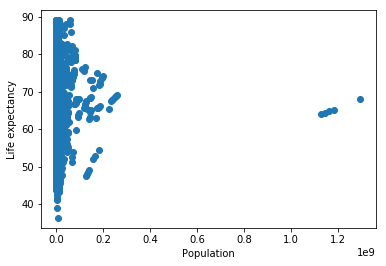

In [196]:
# 
import matplotlib.pyplot as plt
plt.scatter(features['Population'],life_exp)
plt.ylabel('Life expectancy')
plt.xlabel('Population')
plt.show()

**Observation:** Since all countries have population less in number, but some countries like India , Japan, China and Russia have large population. These are very populated countries, which results in cause of outliers. 
From that ouliers, what my intuition is that , country having large population tend to to have less life expectancy as compared to the other countries. Most of the datapoints lies in between ).0 and 0.2 1e9.

**Correlation of 'infant_deaths' with respect to 'Life_expectancy'**

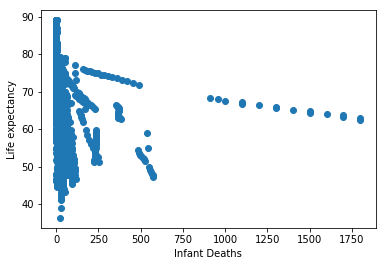

In [197]:
import matplotlib.pyplot as plt
plt.scatter(features['infant_deaths'],life_exp)
plt.ylabel('Life expectancy')
plt.xlabel('Infant Deaths')
plt.show()

**Observation:** Here the plot shows how the infant deaths effect life_expectancy of a country. As the number of deaths are increasing, the life_expectancy is also canstantly decreased for some data points. My intuition is that it causes life expectancy in reducing way as more number of infant deaths are recorded.

**Correlation of 'Polio' with respect to 'life expectancy'**

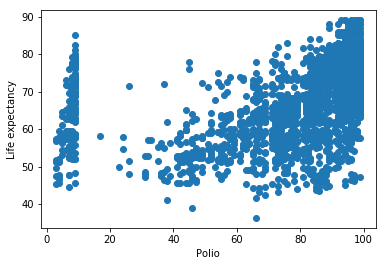

In [198]:
#correlation of polio with life expectancy
plt.scatter(features['Polio'],life_exp)
plt.ylabel('Life expectancy')
plt.xlabel('Polio')
plt.show()

**Observation:** Here the plot shows the correlation of "Polio" with respect to 'Life_expectancy. More number of data points are lie at near to the edge of X-axis. 

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'Population'` , `'Measles'`, `'HIV/AIDS'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [199]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
features_log_transformed = pd.DataFrame(data = features)
numerical = [ 'HIV/AIDS', 'Population','Measles']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,Country,Year,Status,Adult Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources
0,Afghanistan,2015,0,263.0,62,0.01,71.279624,65.0,0.005439,19.1,83,6.0,8.16,65.0,0.0,584.259210,0.026074,17.2,17.3,0.479
1,Afghanistan,2014,0,271.0,64,0.01,73.523582,62.0,0.002319,18.6,86,58.0,8.18,62.0,0.0,612.696514,0.000253,17.5,17.5,0.476
2,Afghanistan,2013,0,268.0,66,0.01,73.219243,64.0,0.002027,18.1,89,62.0,8.13,64.0,0.0,631.744976,0.024525,17.7,17.7,0.470
3,Afghanistan,2012,0,272.0,69,0.01,78.184215,67.0,0.013135,17.6,93,67.0,8.52,67.0,0.0,669.959000,0.002857,17.9,18.0,0.463
4,Afghanistan,2011,0,275.0,71,0.01,7.097109,68.0,0.014200,17.2,97,68.0,7.87,68.0,0.0,63.537231,0.002302,18.2,18.2,0.454


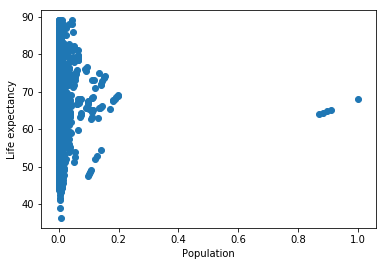

In [200]:
import matplotlib.pyplot as plt
plt.scatter(features['Population'],life_exp)
plt.ylabel('Life expectancy')
plt.xlabel('Population')
plt.show()

In [201]:
#changing country names to integer numbers
features['Country'] = features['Country'].replace(['Afghanistan' , 'Albania' , 'Algeria' , 'Angola' , 'Antigua and Barbuda' , 'Argentina' , 'Armenia' , 'Australia' , 'Austria' , 'Azerbaijan' , 'Bahamas' , 'Bahrain' , 'Bangladesh' , 'Barbados' , 'Belarus' , 'Belgium' , 'Belize' , 'Benin' , 'Bhutan' , 'Bolivia (Plurinational State of)' , 'Bosnia and Herzegovina' , 'Botswana' , 'Brazil' , 'Brunei Darussalam' , 'Bulgaria' , 'Burkina Faso' , 'Burundi' , "Côte d'Ivoire" , 'Cabo Verde' , 'Cambodia' , 'Cameroon' , 'Canada' , 'Central African Republic' , 'Chad' , 'Chile' , 'China' , 'Colombia' , 'Comoros' , 'Congo' , 'Costa Rica' , 'Croatia' , 'Cuba' , 'Cyprus' , 'Czechia' , "Democratic People's Republic of Korea" , 'Democratic Republic of the Congo' , 'Denmark' , 'Djibouti' , 'Dominican Republic' , 'Ecuador' , 'Egypt' , 'El Salvador' , 'Equatorial Guinea' , 'Eritrea' , 'Estonia' , 'Ethiopia' , 'Fiji' , 'Finland' , 'France' , 'Gabon' , 'Gambia' , 'Georgia' , 'Germany' , 'Ghana' , 'Greece' , 'Grenada' , 'Guatemala' , 'Guinea' , 'Guinea-Bissau' , 'Guyana' , 'Haiti' , 'Honduras' , 'Hungary' , 'Iceland' , 'India' , 'Indonesia' , 'Iran (Islamic Republic of)' , 'Iraq' , 'Ireland' , 'Israel' , 'Italy' , 'Jamaica' , 'Japan' , 'Jordan' , 'Kazakhstan' , 'Kenya' , 'Kiribati' , 'Kuwait' , 'Kyrgyzstan' , "Lao People's Democratic Republic" , 'Latvia' , 'Lebanon' , 'Lesotho' , 'Liberia' , 'Libya' , 'Lithuania' , 'Luxembourg' , 'Madagascar' , 'Malawi' , 'Malaysia' , 'Maldives' , 'Mali' , 'Malta' , 'Mauritania' , 'Mauritius' , 'Mexico' , 'Micronesia (Federated States of)' , 'Mongolia' , 'Montenegro' , 'Morocco' , 'Mozambique' , 'Myanmar' , 'Namibia' , 'Nepal' , 'Netherlands' , 'New Zealand' , 'Nicaragua' , 'Niger' , 'Nigeria' , 'Norway' , 'Oman' , 'Pakistan' , 'Panama' , 'Papua New Guinea' , 'Paraguay' , 'Peru' , 'Philippines' , 'Poland' , 'Portugal' , 'Qatar' , 'Republic of Korea' , 'Republic of Moldova' , 'Romania' , 'Russian Federation' , 'Rwanda' , 'Saint Lucia' , 'Saint Vincent and the Grenadines' , 'Samoa' , 'Sao Tome and Principe' , 'Saudi Arabia' , 'Senegal' , 'Serbia' , 'Seychelles' , 'Sierra Leone' , 'Singapore' , 'Slovakia' , 'Slovenia' , 'Solomon Islands' , 'Somalia' , 'South Africa' , 'South Sudan' , 'Spain' , 'Sri Lanka' , 'Sudan' , 'Suriname' , 'Swaziland' , 'Sweden' , 'Switzerland' , 'Syrian Arab Republic' , 'Tajikistan' , 'Thailand' , 'The former Yugoslav republic of Macedonia' , 'Timor-Leste' , 'Togo' , 'Tonga' , 'Trinidad and Tobago' , 'Tunisia' , 'Turkey' , 'Turkmenistan' , 'Uganda' , 'Ukraine' , 'United Arab Emirates' , 'United Kingdom of Great Britain and Northern Ireland' , 'United Republic of Tanzania' , 'United States of America' , 'Uruguay' , 'Uzbekistan' , 'Vanuatu' , 'Venezuela (Bolivarian Republic of)' , 'Viet Nam' , 'Yemen' , 'Zambia' , 'Zimbabwe' , 'Cook Islands' , 'Dominica' , 'Marshall Islands' , 'Monaco' , 'Nauru' , 'Niue' , 'Palau' , 'Saint Kitts and Nevis' , 'San Marino' , 'Tuvalu'], [1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41 ,42 ,43 ,44 ,45 ,46 ,47 ,48 ,49 ,50 ,51 ,52 ,53 ,54 ,55 ,56 ,57 ,58 ,59 ,60 ,61 ,62 ,63 ,64 ,65 ,66 ,67 ,68 ,69 ,70 ,71 ,72 ,73 ,74 ,75 ,76 ,77 ,78 ,79 ,80 ,81 ,82 ,83 ,84 ,85 ,86 ,87 ,88 ,89 ,90 ,91 ,92 ,93 ,94 ,95 ,96 ,97 ,98 ,99 ,100 ,101 ,102 ,103 ,104 ,105 ,106 ,107 ,108 ,109 ,110 ,111 ,112 ,113 ,114 ,115 ,116 ,117 ,118 ,119 ,120 ,121 ,122 ,123 ,124 ,125 ,126 ,127 ,128 ,129 ,130 ,131 ,132 ,133 ,134 ,135 ,136 ,137 ,138 ,139 ,140 ,141 ,142 ,143 ,144 ,145 ,146 ,147 ,148 ,149 ,150 ,151 ,152 ,153 ,154 ,155 ,156 ,157 ,158 ,159 ,160 ,161 ,162 ,163 ,164 ,165 ,166 ,167 ,168 ,169 ,170 ,171 ,172 ,173 ,174 ,175 ,176 ,177 ,178 ,179 ,180 ,181 ,182 ,183 ,184 ,185 ,186 ,187 ,188 ,189 ,190 ,191 ,192 ,193])

## After One Hot Encoding

In [202]:
features_final = pd.get_dummies(features_log_minmax_transform)


# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
features.head()

20 total features after one-hot encoding.


,Country,Year,Status,Adult Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources
0,1,2015,0,263.0,62,0.01,71.279624,65.0,0.005439,19.1,83,6.0,8.16,65.0,0.0,584.259210,0.026074,17.2,17.3,0.479
1,1,2014,0,271.0,64,0.01,73.523582,62.0,0.002319,18.6,86,58.0,8.18,62.0,0.0,612.696514,0.000253,17.5,17.5,0.476
2,1,2013,0,268.0,66,0.01,73.219243,64.0,0.002027,18.1,89,62.0,8.13,64.0,0.0,631.744976,0.024525,17.7,17.7,0.470
3,1,2012,0,272.0,69,0.01,78.184215,67.0,0.013135,17.6,93,67.0,8.52,67.0,0.0,669.959000,0.002857,17.9,18.0,0.463
4,1,2011,0,275.0,71,0.01,7.097109,68.0,0.014200,17.2,97,68.0,7.87,68.0,0.0,63.537231,0.002302,18.2,18.2,0.454


In [203]:
# TO check if our target variable has null or nan values.
life_exp.isnull().sum()

0

Above result which is 0 shows that our target variable has no null or nan values

In [204]:
# TODO: Minimum life expectancy of the data
minimum_age = np.min(life_exp)

# TODO: Maximum life expectancy of the data
maximum_age = np.max(life_exp)

# TODO: Mean life expectancy of the data
mean_age = np.mean(life_exp)

# TODO: Median life expectancy of the data
median_age = np.median(life_exp)

# TODO: Standard deviation of life expectancy of the data
std_age = np.std(life_exp)

# Show the calculated statistics
print("Statistics for Life Expectancy dataset:\n")
print("Minimum number of years: {}".format(minimum_age)) 
print("Maximum number of years: {}".format(maximum_age))
print("Mean number of years: {}".format(mean_age))
print("Median number of years: {}".format(median_age))
print("Standard deviation of number of years: {}".format(std_age))

Statistics for Life Expectancy dataset:

Minimum number of years: 36.3
Maximum number of years: 89.0
Mean number of years: 69.22493169398906
Median number of years: 72.0
Standard deviation of number of years: 9.506021881077226


**Observation:** Above resuls shows that our target variable has 36.3 as the minimum life expectancy, and maximum of 89. Mean number years is 69.24 and median number is 72. It has the standard deviation of 9.5060.

## IMPLEMENTATION OF THE COEFFICIENT OF DETERMINATION :

In [205]:
# Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

## SHUFFLING AND SPLITTING THE DATA

In [206]:
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,life_exp,test_size=0.2,train_size=0.8,random_state=10)

# Successful shuffle and split of the data
print("Training and testing split was successful.")
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training and testing split was successful.
Training set has 2350 samples.
Testing set has 588 samples.


## BENCHMARK MODEL

### DEFINITION :-

A Bench Mark Model can be defined as a standard model that already shows a better performance on a given data.The factors on which our results or the solution is tested, are mostly going to be the amount of training/testing data, and then we compare your solution with that of the benchmarked solution obviously based on a performance metric(here r2_score).

The main theme here is to understand which model works delivers the best solution than their existing solution.So, it can be achieved by sheer analysis, implementing standard algorithms and observance and coming to the conclusion that the model shows good solutions or results than the benchmark model's solution.

Since, the problem is a 'Regression' task , I'm implementing a 'Linear Regression' model as my BenchMark Model.

In [207]:
# importing Linear Regression model library from sklearn# importi 
from sklearn.linear_model import LinearRegression

# Create a linear regression object
reg = LinearRegression()

# Fitting the model using the training sets
reg.fit(X_train, y_train)

# Making predictions using the testing set
y_pred = reg.predict(X_test)

In [208]:
# Calculating the performance of the model 
score  = performance_metric(y_test,y_pred)
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.807.


**Explanation** :-

   It is evident that the Linear Regression Model (BenchMark Model) shows a striking performance of 0.807 which means that the target variable('Life_expectancy') caputerd 80.7% of variance.

## IMPLEMENTATION

In the further section of the project, I'll intuitively select the best out of the three models that I considered for the current problem by using the performance metric(r2_score), based on the results generated, I'll decide best of the three models, which is optimal for the given problem.

### INITIAL MODEL EVALUATION :-
In this section, I'll clearly show the coding implementation of the three supervised learning models

Import the necessary libraries and intialize the models and store them in respective variables.
And finally comparing the r2_scores of the three learning models and decide which one is the best.

#### 1. Decision Tree Regressor



In [209]:
# import necessary library
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor Object
dec_reg = DecisionTreeRegressor(random_state=42)

# Fitting the model using training sets
dec_reg.fit(X_train,y_train)

# Making predictions using the testing set
dec_pred =  dec_reg.predict(X_test)

# Calculating the performance of the decision tree regressor model
dec_score = performance_metric(y_test,dec_pred)
print("Model has a coefficient of determination, R^2, of {:.2f}.".format(dec_score))

Model has a coefficient of determination, R^2, of 0.91.


**Observation:** This model has an a coefficient of determination, R^2 , of 0.91 and considered as good fit model.

#### 2. Support Vector Regressor

In [210]:
# import necessary library
from sklearn.svm import SVR

# Create a Support Vector Regressor Object
svr_reg = SVR()

# Fitting the model using training sets
svr_reg.fit(X_train,y_train)

# Making predictions using the testing set
svr_pred =  svr_reg.predict(X_test)

# Calculating the performance of the decision tree regressor model
svr_score = performance_metric(y_test,svr_pred)
print("Model has a coefficient of determination, R^2, of {:.2f}.".format(svr_score))

Model has a coefficient of determination, R^2, of -0.08.


#### 3. Random Forest Regressor

In [211]:
# import necessary library
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor Object
rfr_reg = RandomForestRegressor(random_state=42)

# Fitting the model using training sets
rfr_reg.fit(X_train,y_train)

# Making predictions using the testing set
rfr_pred =  rfr_reg.predict(X_test)

# Calculating the performance of the decision tree regressor model
rfr_score = performance_metric(y_test,rfr_pred)
#plt.scatter(y_test,y_pred)
#plt.show()
print("Model has a coefficient of determination, R^2, of {:.2f}.".format(rfr_score))

Model has a coefficient of determination, R^2, of 0.96.


**Observation:** Here using Random forest regressor I got R^2 score of 0.96 , which is an excellent score and considered this model as good fit. Hence comparing all the three models I've taken above( linear regressor, SVM and Random Forest regressor), I'll go with Random forest regressor as it fits the model best and will give good results. 

In [212]:
# importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV


def fit_model(X_train,y_train):
    # Initialize the Regressor
    lgr_grid = RandomForestRegressor(random_state=42)
    
    # Create the parameters list to tune.
    params = {"n_estimators"      : [105,205,305],
              "max_features"      : ["auto", "sqrt", "log2"],
              "min_samples_split" : [2,4,8],
              "bootstrap": [True, False]}
    
    # Make an r2_scorer scoring object using make_scorer()
    scorer = make_scorer(performance_metric)

    # Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
    grid_obj = GridSearchCV(lgr_grid,params,scoring=scorer)

    # Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X_train,y_train)

    # calculate the estimator
    best_clf = grid_fit.best_estimator_

    # Return the optimal model after fitting the data
    best_predictions = best_clf.predict(X_test)

    return grid_fit.best_estimator_


In [213]:

rf_reg = fit_model(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
print("regression score of {:.3f}".format(performance_metric(y_test,rf_pred)))
# Produce the value for 'max_depth'
#print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']

regression score of 0.967



### Observation :-

It is quite obvious that the 'Random Forest Regressor' Model showed a best improvement upon Model Tuning using the GridSearchCV technique.

We can observe the trend of the improvement by the values tabulated as follows :-

| Metric	| Random Forest Regressor(Before Tuning)	| Random Forest Regressor Model(After Tuning)|
|-----------|-------------------------------------------|--------------------------------------------|
|r2 score	|0.96	|0.967   |

It is quite evident from the table that the Random Forest Regressor showed a good improvement upon optimization by the target variable accounting for about 76.1% of the variance.

### FINAL MODEL EVALUATION
In this part of the project I'll demonstrate the comparison of the performances between the BenchMark Model('Linear Regressor') and the Opmital Model('Random Tree Regressor') based on their performance metrics(r2_score) in a tabular form.

#### Results
|Metric	|Linear Regressor Model(BenchMark Model)|	Random Forest Regressor Model(Optimal Model)|
|-------|---------------------------------------|-----------------------------------------------|
|r2 score|	0.807|	0.967|

### Observation :-
Although the performances of the BenchMark Model and the Optimal Model thus considered are quite figurative and are literally showing nearly similar performances, it is quite evident that the Random Forest Regressor Model(Optimal Model) shows an awesome performance than the Linear Regressor Model(BenchMark Model).

And it is quite obvious that Random Forest Regressor Model i.e., Optimal Model shows a better performance on the input dataset.

### MODEL VALIDATION
In this part of the project, I'll demonstrate the performance of the Best Model for the given regression task i.e., The Optimal Model aganist unseen data.

In [216]:
b_score=[[1,2015,0,0.362881,62,0.01,71.279624,65.0,0.005439,0.209733,83,6.0,8.16,65.0,0.0,584.259210,0.026074,17.2,17.3,0.479]]
print("number of years:")
rf_reg.predict(b_score)

number of years:


array([63.9102439])

**Result:** By looking at above prediction of life expectancy of a country( 1 means Afganisthan) , it has 63.91 years of life expectancy in 2015(actual is 65). And it was predicted using the model, Random forest regression.

Below cell will run for some examples 

### Task - Predicting Life expectancy of some countries

Here I'll take some countries as examples to predict the life expectancy by taking all the necessary data into account. I wanna take 3 countries data to predict life expectancy.
 Below cell will produce data of a 3 countries, probably U.S.A, Japan and India. We will store it in grid or matrix.

In [217]:
features.loc[[2794,1314,1186]]

,Country,Year,Status,Adult Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources
2794,175,2015,1,13.0,23,4.602861,0.0,92.000000,0.000886,69.6,26,93.0,5.93819,95.0,0.00000,7483.158469,0.009857,0.8,0.6,0.627551
1314,83,2015,1,55.0,2,4.602861,0.0,80.940461,0.000165,29.0,3,99.0,5.93819,96.0,0.00000,34474.137360,0.000098,2.1,1.8,0.902000
1186,75,2015,0,181.0,910,4.602861,0.0,87.000000,0.425986,18.7,1100,86.0,5.93819,87.0,0.00198,1613.188780,0.001078,26.7,27.3,0.615000


In [218]:
# Following is the code for predicting the life expectancy by considering the Random Forest Regressor Model i.e.,The Optimal Model 
#k_scores = reg.feature_importances_
# Producing a matrix for the the data
my_data = [[175,2015,1,0.016620,23,4.602861,0.0,92.000000,0.000886,0.794902,26,93.0,5.93819,95.0,0.00000,7483.158469,0.009857,0.8,0.6,0.627551],
                [83,2015,1,0.074792,2,4.602861,0.0,80.940461,0.000165,0.324450,3,99.0,5.93819,96.0,0.00000,34474.137360,0.000098,2.1,1.8,0.902000],
                [75,2015,0,0.249307,910,4.602861,0.0,87.000000,0.425986,0.205098,1100,86.0,5.93819,87.0,0.00198,1613.188780,0.001078,26.7,27.3,0.615000]]
# Displaying the results
#print(k_scores)
#print student_data
#print reg.predict(student_data)
#plt.plot(reg.predict(student_data),student_data)
#plt.show()
for i, score in enumerate(rf_reg.predict(my_data)):
    print("Predicted life expectancy of country {}: {:,.2f}".format(i+1, score))

Predicted life expectancy of country 1: 77.93
Predicted life expectancy of country 2: 83.71
Predicted life expectancy of country 3: 68.91


### Observation:

All features have a major weight in our case. But taking some features into account I'll explain how the predicted number will relate to this. From the above obtained results , I conclude that:
- U.S.A has life expactancy of 77.93 as predicted. The main factors which involved in the number of years obtained are its 'Status' is 'Developed', a country which is termed as developed, known to have rich in resources and malnutrition . Population and Income compositionof resources are helps in increase of life expectancy. BMI also indicates that it's the  cause of obesity and leads to decrease in life expectancy . It looks like U.S have high BMI rate compared to other two countris. It has more number of deaths due to Hepatitis B and Polio.
- Japan, the predicted life expectancy is 83.71 . This country's status is developed and has less number of deaths due to diseases like Hepatitis B, Measles an HIV/AIDs. It has less number of infant deaths. 
- India, on the other hand, has life expectancy 68.91 , due to having more number of infant deaths,deaths due to polio and  adult mortality rate is also high. GDP is low as compared to the developed countries like U.S and Japan. Population is also key factor here to consider as population increases resources will get decreased and expenditure spent also dectresed due to mass.